<a href="https://colab.research.google.com/github/arhammehta/Handwritten-Math-Equation-Detection/blob/main/Handwritten_Math_Equations_Detect%5BFinal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# set current working directory
%cd /content/drive/My Drive/Colab Notebooks/

# check current working directory
!pwd

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [ ]:
import os,shutil

pat='/content/drive/My Drive/Colab Notebooks/dataset/'
total=0
for p in os.listdir(pat):
    frac = 0.2*len(os.listdir(pat+p))
    frac= round(frac)
    total=total+len(os.listdir(pat+p))
    print(p,len(os.listdir(pat+p)),frac)
    dest='/content/drive/My Drive/Colab Notebooks/test/'+p
    os.mkdir(dest)
    #print(p)
    for i,ip in enumerate(os.listdir(pat+p)):
        if i<frac:
            shutil.move(pat+p+'/'+ip,dest)

In [ ]:
# unzip
path='/content/drive/My Drive/Colab Notebooks/pro2000.zip'
import zipfile
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
#make csv
import numpy as np, os
from imutils import paths 
import cv2, csv, random
from keras.preprocessing.image import ImageDataGenerator,img_to_array
imagePaths = sorted(list(paths.list_images('/content/drive/My Drive/Colab Notebooks/train/')))
kernel = np.ones((2,2),np.uint8)
random.seed(42)
random.shuffle(imagePaths)
for imagePath in imagePaths:
    image = cv2.imread(imagePath,0)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.bitwise_not(image)
    image = cv2.dilate(image, kernel, iterations=1)
    image = img_to_array(image)
    image = np.array(image)
    #image= image.flatten()
    image = image.reshape([45*45])
    label = imagePath.split(os.path.sep)[-2]
    
    value = np.append(label,image)
    with open("/content/drive/My Drive/Colab Notebooks/train2k.csv", 'a') as f:
      writer = csv.writer(f)
      writer.writerow(value)

Using TensorFlow backend.


In [ ]:
#show distribution
pat='/content/drive/My Drive/Colab Notebooks/train/'
dict={}
for p in os.listdir(pat):
    dict[p]=len(os.listdir(pat+p))
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x={k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
ax.bar(x.keys(),x.values())
plt.show()  

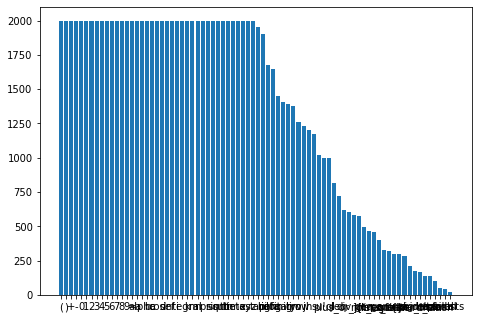

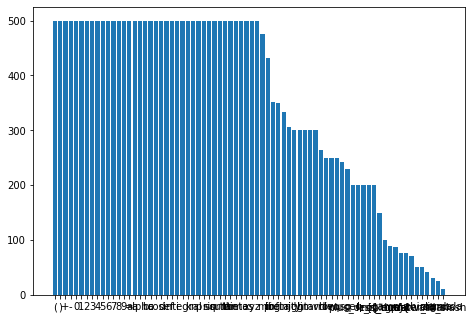

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/lenet/Figure_1.png')
cv2_imshow(image)
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/lenet/Figure_2.png')
cv2_imshow(image)

In [ ]:
#libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
import os, sys, gc
import matplotlib.image as mpimg
from imutils import paths
from sklearn.model_selection import train_test_split
from keras import layers,models,optimizers
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.use('Agg')
import pickle
import imutils
from skimage import measure
from google.colab.patches import cv2_imshow

import keras.backend as K
from callbacks.epochcheckpoint import EpochCheckpoint
from callbacks.trainingmonitor import TrainingMonitor
from keras.callbacks import ModelCheckpoint


In [ ]:
#gpu
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



(106978, 2025) (106978, 1)


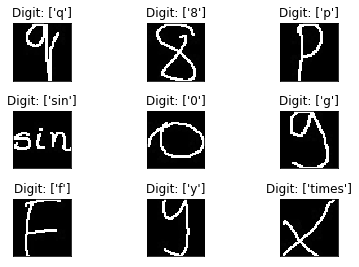

In [ ]:
#load data
import pandas as pd     
train_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train2k.csv')
y=train_data.iloc[:,0:1]
x=train_data.iloc[:,1:]
x=x/255
x=np.array(x)
y=np.array(y)
X_train=x.reshape(-1,45,45,1)
print(x.shape,y.shape)
lb = LabelBinarizer()
Y_train = lb.fit_transform(y)

import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x[i].reshape(45,45), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y[i]))
  plt.xticks([])
  plt.yticks([])
fig


(26590, 2025) (26590, 1)


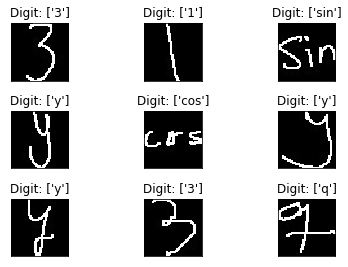

In [ ]:
test_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test500.csv')
y=test_data.iloc[:,0:1]
x=test_data.iloc[:,1:]
x=x/255
x=np.array(x)
y=np.array(y)
X_test=x.reshape(-1,45,45,1)
print(x.shape,y.shape)
Y_test = lb.transform(y)

import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x[i].reshape(45,45), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y[i]))
  plt.xticks([])
  plt.yticks([])
fig


In [ ]:
#for lb_classes

classes=len(lb.classes_)
f = open('/content/drive/My Drive/Colab Notebooks/vgnet/lben.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

In [ ]:
#callbacks
plotPath = os.path.sep.join(["/content/drive/My Drive/Colab Notebooks/vgnet/output", "vgnet30.png"])
jsonPath = os.path.sep.join(["/content/drive/My Drive/Colab Notebooks/vgnet/output", "vgnet30.json"])

mc_acc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/vgnet/best_acc.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_loss = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/vgnet/best_loss.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
mc_period = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/vgnet/saved-model-{epoch:02d}.h5', verbose=1, period = 5)

# construct the set of callbacks
callbacks = [EpochCheckpoint('/content/drive/My Drive/Colab Notebooks/vgnet/output/checkpoints', every=5, startAt=1),
	TrainingMonitor(plotPath,jsonPath=jsonPath,	startAt=1),mc_acc,mc_loss,mc_period]



In [ ]:
# augment data 
aug= ImageDataGenerator(rotation_range=18, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2)


In [ ]:
#leNet
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,MaxPool2D
from keras.optimizers import RMSprop, Adam


model = Sequential()
model.add(Conv2D(activation='relu', padding='Same', filters=32, kernel_size=(3,3), input_shape=(45,45,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(78, activation='softmax'))

#parameters
lr= 0.001
epochs = 30
batch_size = 128

#optimizer = RMSprop(lr=lr, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=lr, decay=lr / epochs, epsilon=1e-08)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:

model_with_data_augmentation = model.fit_generator(aug.flow(x=X_train, y=Y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_test, Y_test), verbose=1, steps_per_epoch=(X_train.shape[0]//batch_size),callbacks=callbacks)
model.save('/content/drive/My Drive/Colab Notebooks/lenet/lenet30.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30




835/835 [==============================] - 285s 341ms/step - loss: 1.2966 - acc: 0.6450 - val_loss: 0.3403 - val_acc: 0.9037

Epoch 00001: val_acc improved from -inf to 0.90372, saving model to /content/drive/My Drive/Colab Notebooks/lenet/best_acc.h5

Epoch 00001: val_loss improved from inf to 0.34026, saving model to /content/drive/My Drive/Colab Notebooks/lenet/best_loss.h5
Epoch 2/30
835/835 [==============================] - 284s 340ms/step - loss: 0.6662 - acc: 0.8033 - val_loss: 0.2738 - val_acc: 0.9234

Epoch 00002: val_acc improved from 0.90372 to 0.92335, saving model to /content/drive/My Drive/Colab Notebooks/lenet/best_acc.h5

Epoch 00002: val_loss improved from 0.34026 to 0.27384, saving model to /content/drive/My Drive/Colab Notebooks/lenet/best_loss.h5
Epoch 3/30
835/835 [==============================] - 286s 343ms/step - loss: 0.5464 - acc: 0.8356 - val_loss: 

In [ ]:
#plot
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model_with_data_augmentation.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_with_data_augmentation.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_with_data_augmentation.history["acc"], label="train_accuracy")
plt.plot(np.arange(0, N), model_with_data_augmentation.history["val_acc"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig('/content/drive/My Drive/Colab Notebooks/lenet/lenet30')


In [ ]:
#vgnet
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,MaxPool2D
from keras.optimizers import RMSprop, Adam


model = Sequential()
model.add(Conv2D(activation='relu', padding='Same', filters=32, kernel_size=(3,3), input_shape=(45,45,1)))
model.add(Conv2D(activation='relu', padding='Same', filters=32, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(78, activation='softmax'))

#parameters
lr= 0.001
epochs = 30
batch_size = 128

#optimizer = RMSprop(lr=lr, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=lr, decay=lr / epochs, epsilon=1e-08)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_with_data_augmentation = model.fit_generator(aug.flow(x=X_train, y=Y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_test, Y_test), verbose=1, steps_per_epoch=(X_train.shape[0]//batch_size),callbacks=callbacks)
model.save('/content/drive/My Drive/Colab Notebooks/vgnet/vgnet30.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30




835/835 [==============================] - 691s 828ms/step - loss: 1.2071 - acc: 0.6709 - val_loss: 0.3285 - val_acc: 0.9061

Epoch 00001: val_acc improved from -inf to 0.90613, saving model to /content/drive/My Drive/Colab Notebooks/vgnet/best_acc.h5

Epoch 00001: val_loss improved from inf to 0.32849, saving model to /content/drive/My Drive/Colab Notebooks/vgnet/best_loss.h5
Epoch 2/30
835/835 [==============================] - 696s 833ms/step - loss: 0.6027 - acc: 0.8233 - val_loss: 0.2350 - val_acc: 0.9331

Epoch 00002: val_acc improved from 0.90613 to 0.93313, saving model to /content/drive/My Drive/Colab Notebooks/vgnet/best_acc.h5

Epoch 00002: val_loss improved from 0.32849 to 0.23503, saving model to /content/drive/My Drive/Colab Notebooks/vgnet/best_loss.h5
Epoch 3/30
835/835 [==============================] - 690s 826ms/step - loss: 0.4921 - acc: 0.8537 - val_loss: 

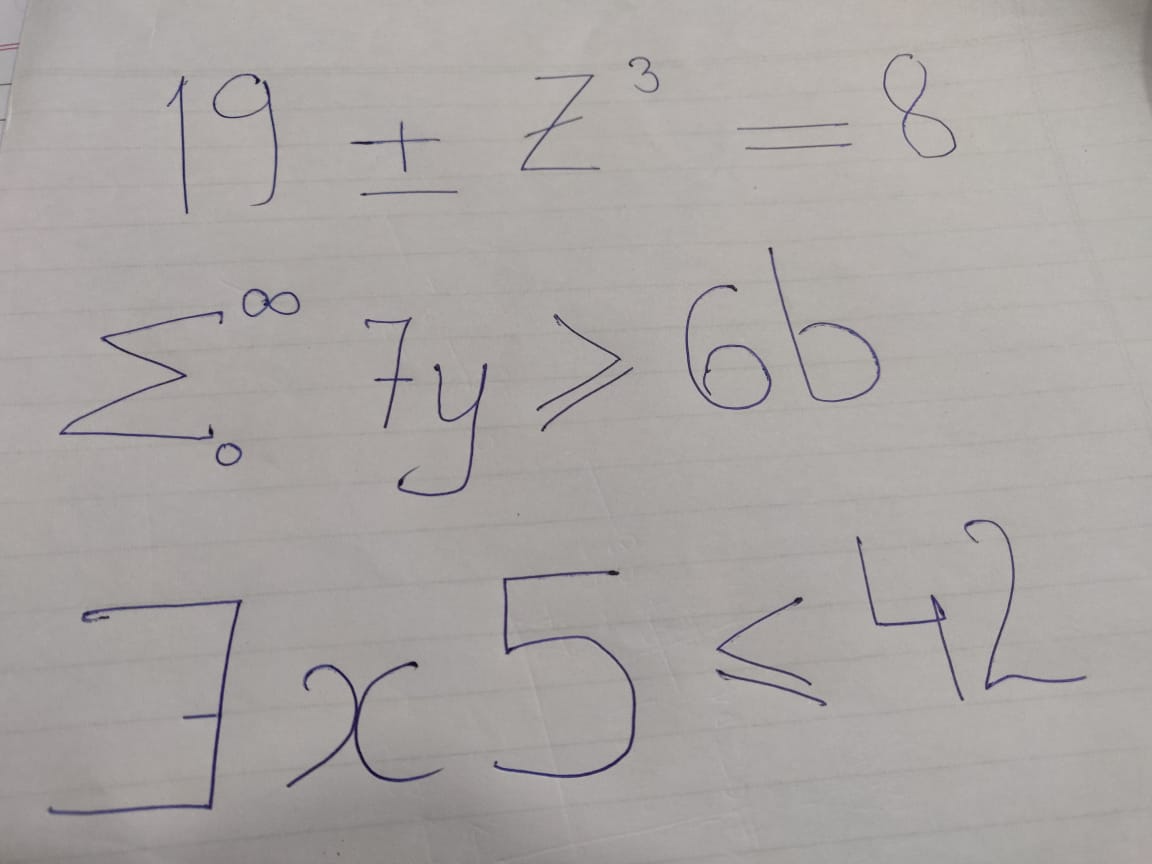

In [ ]:
#segmentation start
#replace _imshow with .imshow when not running on colab
#change master_path
from imutils import paths
import cv2, os, numpy as np
import pickle
from keras.preprocessing.image import img_to_array
import shutil


master_path='/content/drive/My Drive/Colab Notebooks/lenet/test/'

try:
    shutil.rmtree(master_path)
except:
    print('No such directory exists')
finally:
    os.mkdir(master_path)

#read
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/lenet/3q.jpeg')
cv2_imshow(image)
#cv2.waitKey(0)

#preprocess
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)
#cv2.waitKey(0)

blur = cv2.GaussianBlur(gray,(5,5),0)
#cv2_imshow(blur)
#cv2.waitKey(0)

canny=cv2.Canny(blur,50,147,L2gradient=False)
#cv2_imshow(canny)
#cv2.waitKey(0)

blur = cv2.GaussianBlur(canny,(5,5),0)
#cv2_imshow(blur)
#cv2.waitKey(0)

#multiple lines
images=[]
pro_images=[]
x=[]
flag=0

#multiline
for c,r in enumerate(blur):
    t=sum(r)
    x.append(t)
    if t>765 and flag==0:
        top = c
        flag=1
    elif flag==1 and (t<255 or c+1==blur.shape[0]):
        bottom = c
        #print(top,bottom)
        flag=0
        images.append(image[round(max(top - 0.09*(bottom-top),0)):round(min(bottom + 0.09*(bottom-top),canny.shape[0])),:])
        pro_images.append(blur[round(max(top - 0.09*(bottom-top),0)):round(min(bottom + 0.09*(bottom-top),canny.shape[0])),:])

       
     


In [ ]:
#load specific model
lenet20=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/lenet/saved-model-20.h5')
pro2k21=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/lenet/pro2k21.h5')
lenet15=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/lenet/saved-model-15.h5')
vgnet20=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/vgnet/saved-model-20.h5')
lb = pickle.loads(open('/content/drive/My Drive/Colab Notebooks/lenet/lben.pickle', "rb").read())


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


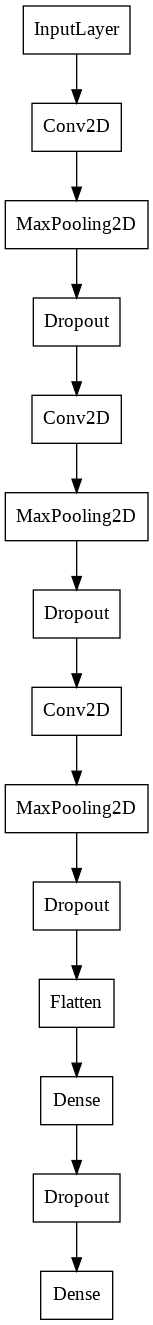

In [ ]:

from tensorflow.keras.utils import plot_model
#plot_model(pro2k21, to_file='pro2k21.png', show_shapes=True, show_layer_names=True,)
plot_model(model, to_file='lenet20.png', show_shapes=False, show_layer_names=False,rankdir='TB' )
#plot_model(lenet15, to_file='lenet15.png', show_shapes=True, show_layer_names=True)

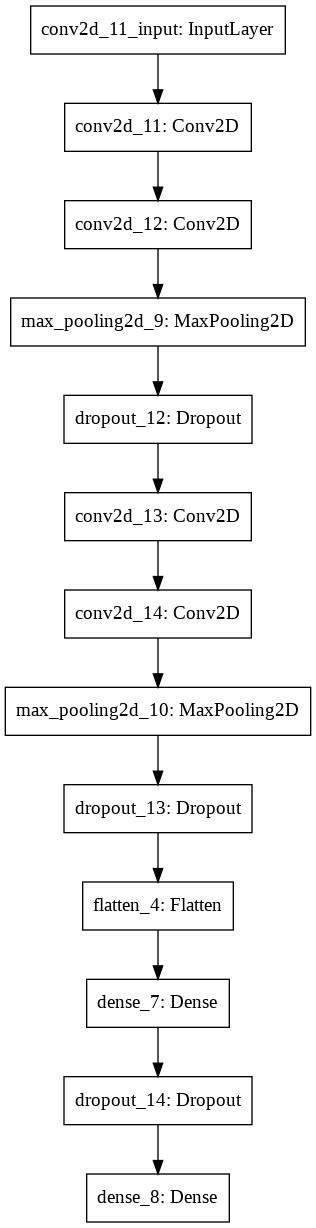

In [ ]:
plot_model(model, to_file='vgnet20n.png', show_shapes=False, show_layer_names=True)

In [ ]:
#segment
boxed_images=[]
#z='a'
px,py,pw,ph=0,0,0,0
pc_type=''
#avgw,avgh=0,0  
#contour
for count,im in enumerate(images):
    
    #maxh=images[count].shape[0]
    maxh=0
    img=im.copy()    
    #cv2_imshow(images[count])
    #cv2.waitKey(0)
    #cv2_imshow(pro_images[count])
    #cv2.waitKey(0)
    os.mkdir(master_path+str(count))
    z='a'
    contours, hierarchy = cv2.findContours(pro_images[count],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    for j in range(0,len(contours)):
        
        if cv2.contourArea(contours[j])>100:
            [x,y,w,h] = cv2.boundingRect(contours[j])
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            #z=z+1
            #cv2_imshow(img)
            #cv2.waitKey(0)
            
            #super,sub script
            if y<0.3*im.shape[0] and y+h<im.shape[0]/2.5:
                #print('super')
                c_type='super'
            elif y>3*im.shape[0]/5 and y+h>im.shape[0]-0.3*im.shape[0]:
                #print('sub')
                c_type='sub'
            else:
                #print('normal')
                c_type='normal'
            
            # =,geq,leq
            #if h>maxh:
            maxh=im.shape[0]/1.4#h
            
            if (x-px<(pw/2) and abs(y+h-py-ph)<maxh/2) and j!=0: 
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                cv2.rectangle(img,(px,min(y-10,py-10)),(max(px+pw,x+w),max(y+h+10,py+ph+10)),(255,0,0),2)
                z=chr(ord(z)-1)
                if c_type!=pc_type:#c_type=='normal' or pc_type=='normal':
                    c_type='normal'
                os.remove(master_path+str(count)+'/'+str(z)+'_{}.png'.format(pc_type))
                cv2.imwrite(master_path+str(count)+'/'+str(z)+'_{}.png'.format(c_type),im[max(min(y-28,py-28),0):min(max(y+h+28,py+ph+28),img.shape[0]),max(px-7,0):min(max(px+pw,x+w)+7,img.shape[1])])
                #avgw=avgw+ (min(max(px+pw,x+w)+10,img.shape[1]) - max(px-10,0))
                #avgh=avgh+ (min(max(y+h+28,py+ph+28),im.shape[0]) - max(min(y-28,py-28),0))

            else:
                cv2.imwrite(master_path+str(count)+'/'+str(z)+'_{}.png'.format(c_type),im[max(0,y-28):min(y+h+28,img.shape[0]),max(x-7,0):min(x+w+7,img.shape[1])])
                #avgw=avgw+( min(x+w+10,img.shape[1]) - max(x-10,0))
                #avgh=avgh+(min(y+h+28,im.shape[0]) - max(0,y-28) )
            
            pw=w
            px=x
            py=y
            ph=h
            pc_type=c_type
            z=chr(ord(z)+1)
            
    #cv2_imshow(img)
    boxed_images.append(img)
    #print('\n\n\n') 

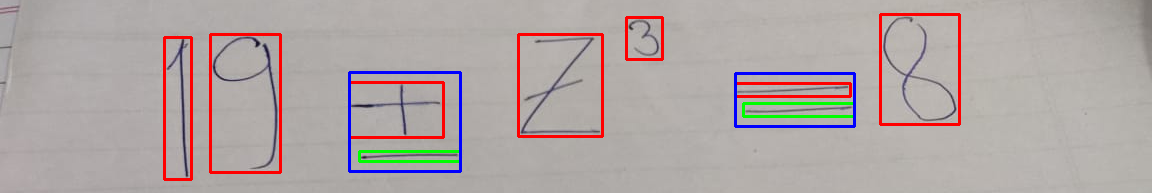

/content/drive/My Drive/Colab Notebooks/lenet/test/0/a_normal.png
lenet20 i 85.46%
lenet20 t 2.90%
vgnet20 i 87.48%
vgnet20 t 6.98%


/content/drive/My Drive/Colab Notebooks/lenet/test/0/b_normal.png
lenet20 9 83.89%
lenet20 rightarrow 9.63%
vgnet20 9 85.12%
vgnet20 s 4.18%


/content/drive/My Drive/Colab Notebooks/lenet/test/0/c_normal.png
lenet20 plus_or_minus 100.00%
lenet20 = 0.00%
vgnet20 plus_or_minus 100.00%
vgnet20 = 0.00%


/content/drive/My Drive/Colab Notebooks/lenet/test/0/d_normal.png
lenet20 z 95.96%
lenet20 geq 3.41%
vgnet20 z 95.45%
vgnet20 = 1.92%


/content/drive/My Drive/Colab Notebooks/lenet/test/0/e_super.png
lenet20 3 81.50%
lenet20 z 13.80%
vgnet20 z 67.06%
vgnet20 3 28.32%


/content/drive/My Drive/Colab Notebooks/lenet/test/0/f_normal.png
lenet20 = 100.00%
lenet20 t 0.00%
vgnet20 = 100.00%
vgnet20 div 0.00%


/content/drive/My Drive/Colab Notebooks/lenet/test/0/g_normal.png
lenet20 8 55.66%
lenet20 b 34.80%
vgnet20 8 86.49%
vgnet20 b 11.41%



Final

['i', '9',

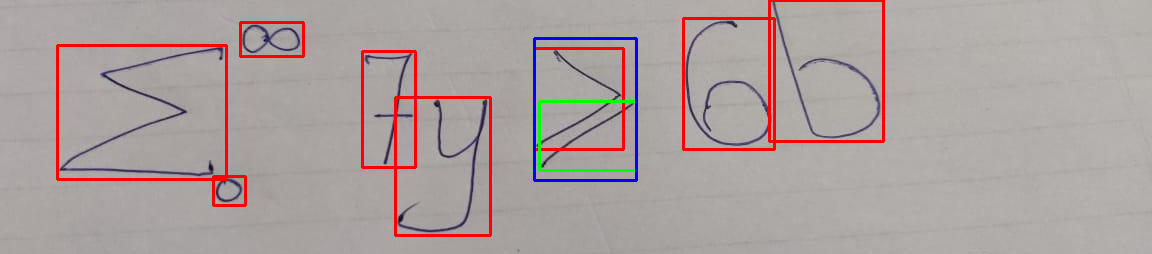

/content/drive/My Drive/Colab Notebooks/lenet/test/1/a_normal.png
lenet20 sum 99.91%
lenet20 leq 0.06%
vgnet20 sum 100.00%
vgnet20 e 0.00%


/content/drive/My Drive/Colab Notebooks/lenet/test/1/b_sub.png
lenet20 tan 50.45%
lenet20 cos 39.57%
vgnet20 tan 39.14%
vgnet20 z 36.23%


/content/drive/My Drive/Colab Notebooks/lenet/test/1/c_super.png
lenet20 infinity 98.74%
lenet20 cos 0.61%
vgnet20 infinity 79.67%
vgnet20 cos 10.25%


/content/drive/My Drive/Colab Notebooks/lenet/test/1/d_normal.png
lenet20 7 99.32%
lenet20 not_equal 0.67%
vgnet20 7 98.81%
vgnet20 not_equal 1.18%


/content/drive/My Drive/Colab Notebooks/lenet/test/1/e_normal.png
lenet20 y 87.57%
lenet20 u 9.33%
vgnet20 y 92.66%
vgnet20 4 7.15%


/content/drive/My Drive/Colab Notebooks/lenet/test/1/f_normal.png
lenet20 geq 49.88%
lenet20 rightarrow 35.48%
vgnet20 geq 95.06%
vgnet20 = 4.38%


/content/drive/My Drive/Colab Notebooks/lenet/test/1/g_normal.png
lenet20 theta 33.42%
lenet20 0 18.89%
vgnet20 6 75.17%
vgnet20 theta 1

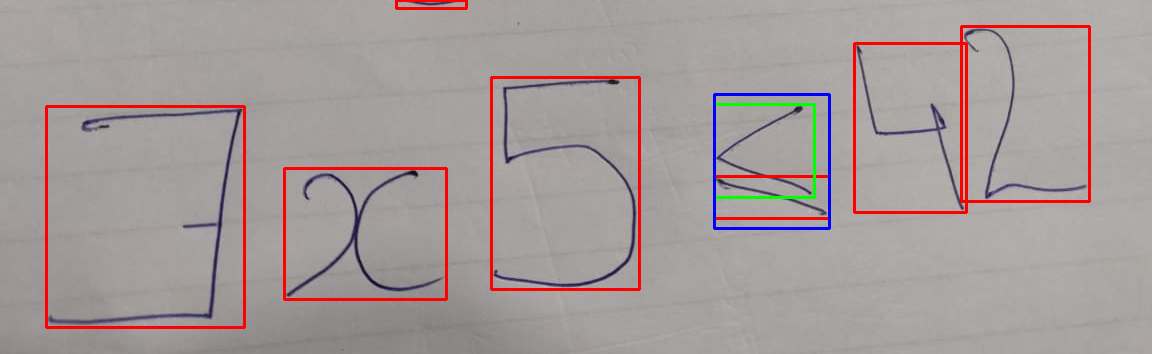

/content/drive/My Drive/Colab Notebooks/lenet/test/2/a_normal.png
lenet20 3 24.70%
lenet20 ] 23.93%
vgnet20 exists 84.04%
vgnet20 7 15.17%


/content/drive/My Drive/Colab Notebooks/lenet/test/2/b_normal.png
lenet20 x 100.00%
lenet20 times 0.00%
vgnet20 x 100.00%
vgnet20 pi 0.00%


/content/drive/My Drive/Colab Notebooks/lenet/test/2/c_super.png
lenet20 = 79.23%
lenet20 t 12.87%
vgnet20 = 88.10%
vgnet20 7 5.20%


/content/drive/My Drive/Colab Notebooks/lenet/test/2/d_normal.png
lenet20 5 83.37%
lenet20 s 16.60%
vgnet20 5 99.91%
vgnet20 s 0.08%


/content/drive/My Drive/Colab Notebooks/lenet/test/2/e_normal.png
lenet20 leq 99.13%
lenet20 less_than 0.82%
vgnet20 leq 99.98%
vgnet20 less_than 0.02%


/content/drive/My Drive/Colab Notebooks/lenet/test/2/f_normal.png
lenet20 4 98.45%
lenet20 h 0.51%
vgnet20 4 99.85%
vgnet20 rightarrow 0.08%


/content/drive/My Drive/Colab Notebooks/lenet/test/2/g_normal.png
lenet20 2 98.70%
lenet20 k 0.60%
vgnet20 2 99.97%
vgnet20 r 0.01%



Final

['exists',

In [ ]:
#predict
#imagePaths = (list(paths.list_images('D:\\Machine Learning\\test\\test\\0\\')))
#for imagePath in imagePaths:
for imagePaths in os.listdir('/content/drive/My Drive/Colab Notebooks/lenet/test/'):
    #ans1=[]
    #ans2=[]
    ans=[]
    cv2_imshow(boxed_images[int(imagePaths)])
    #print(imagePaths)
    imagePaths=master_path+imagePaths+'/'
    for imagePath in os.listdir(imagePaths):
        print(imagePaths+imagePath)
        image = cv2.imread(imagePaths+imagePath,0)
        image = cv2.GaussianBlur(image,(15,15),0)
        image = cv2.adaptiveThreshold(image,255,1,1,11,2)
        imageh = image.copy()
        #cv2_imshow(image)
        #cv2.waitKey(0)
        image = cv2.resize(image, (45, 45))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        #proba5 = lenet2.predict(image)[0]
        proba6 = lenet20.predict(image)[0]
        proba7 = vgnet20.predict(image)[0]
        
        #for q in np.argsort(-proba5)[:2]:
        #    print("lenet2",lb.classes_[q],'{:.2f}%'.format(proba5[q]*100))

        for q in np.argsort(-proba6)[:2]:
            print("lenet20",lb.classes_[q],'{:.2f}%'.format(proba6[q]*100))
        
        for q in np.argsort(-proba7)[:2]:
            print("vgnet20",lb.classes_[q],'{:.2f}%'.format(proba7[q]*100))
        
        print('\n')
        
        #q0=np.argmax(proba5)
        q1=np.argmax(proba6)
        q2=np.argmax(proba7)


        # three models perfoem slightly better, after testing on a very small set of 150+ images,
        '''if proba6[q1]>proba7[q2] and proba6[q1]>proba5[q0]:
            q=q1
        elif proba5[q0]>proba7[q2] and proba5[q0]>proba6[q1]:
            q=q0
        else:
            q=q2'''

        q=q1 if proba6[q1]>proba7[q2] else q2
        if imagePath[-5]=='r':
            ansapp= 'super('+lb.classes_[q]+')'
            ans.append(ansapp)
            #ansapp= '^'+lb.classes_[q2] #'super('+lb.classes_[q]+')'
            #ans2.append(ansapp)
        elif imagePath[-5]=='b':
            ansapp='sub('+lb.classes_[q]+')'
            ans.append(ansapp)
            #ansapp='sub('+lb.classes_[q2]+')'
            #ans2.append(ansapp)
        else:
            ans.append(lb.classes_[q])
            #ans2.append(lb.classes_[q2])
    print('\nFinal\n')
    print(ans)
    #print(ans2)
    print('\n\n')
    

In [ ]:
#load model
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/output/checkpoints/epoch_5.hdf5')
#K.set_value(model.optimizer.lr, 1e-2)
loss, acc =model.evaluate(X_test,  Y_test, verbose=2)
print(loss,'Restored model, accuracy: {:5.2f}%'.format(100*acc))
print(K.get_value(model.optimizer.lr))
#load lb
#lb = pickle.loads(open('/content/drive/My Drive/Colab Notebooks/test2/lb.pickle', "rb").read())


In [ ]:
#pointless cause no separate test set
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test, len(Y_test)// batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(Y_test, axis =1)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names= lb.classes_ ))